## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 7s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1500 images belonging to 5 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 30 images belonging to 5 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\saad4\AppData\Local\Temp\ipykernel_30544\3647634377.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/2
47/47 [==============================] - 100s 2s/step - loss: 4.7934 - accuracy: 0.2720 - val_loss: 1.8014 - val_accuracy: 0.3000
Epoch 2/2
47/47 [==============================] - 88s 2s/step - loss: 1.4688 - accuracy: 0.4247 - val_loss: 0.9966 - val_accuracy: 0.6000


In [17]:
import matplotlib.pyplot as plt

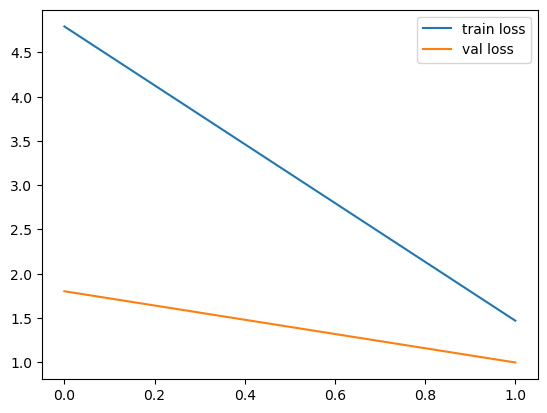

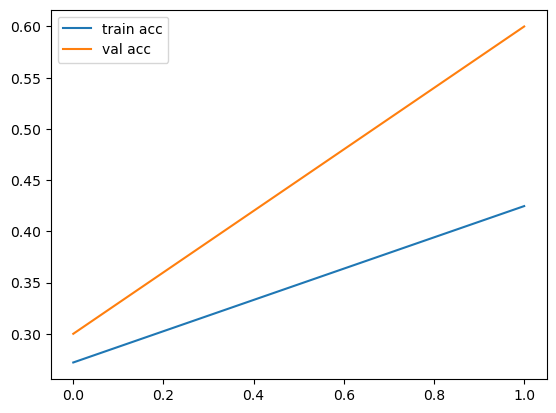

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [20]:

y_pred = model.predict(test_set)


1/1 [==============================] - 2s 2s/step


In [21]:
y_pred

array([[4.00280654e-02, 6.73466802e-01, 9.20880437e-02, 9.09284204e-02,
        1.03488602e-01],
       [5.81277944e-02, 5.59024215e-01, 6.88617229e-02, 6.90893829e-02,
        2.44896889e-01],
       [5.37944585e-02, 6.33658111e-01, 7.96442777e-02, 6.57786652e-02,
        1.67124525e-01],
       [2.49717291e-03, 2.09868252e-02, 8.98783863e-01, 6.24502301e-02,
        1.52818598e-02],
       [4.67186943e-02, 6.69552445e-01, 6.72670305e-02, 7.04647899e-02,
        1.45996973e-01],
       [2.36354396e-03, 6.21071346e-02, 9.27794933e-01, 6.40991284e-03,
        1.32440752e-03],
       [1.86803564e-01, 3.45258862e-01, 1.27837673e-01, 1.78692073e-01,
        1.61407754e-01],
       [1.32986054e-01, 2.68440723e-01, 9.92143899e-02, 2.72241414e-01,
        2.27117434e-01],
       [7.93275014e-02, 4.01299953e-01, 1.41558513e-01, 8.69864002e-02,
        2.90827602e-01],
       [6.48121089e-02, 5.37204981e-01, 6.52818307e-02, 8.12665522e-02,
        2.51434505e-01],
       [7.60472417e-02, 5.7894

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 2, 1, 4, 4, 4, 2, 1, 1, 3, 3, 1,
       2, 1, 1, 2, 4, 1, 2, 2], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [37]:
img=image.load_img('Datasets/Test/cloudy/cloudy_5.jpg',target_size=(224,224))



In [38]:
x=image.img_to_array(img)
x

array([[[ 52.,  55.,  60.],
        [ 51.,  54.,  61.],
        [ 52.,  55.,  64.],
        ...,
        [ 24.,  29.,  32.],
        [ 25.,  30.,  33.],
        [ 24.,  29.,  32.]],

       [[ 56.,  59.,  66.],
        [ 53.,  56.,  63.],
        [ 52.,  55.,  64.],
        ...,
        [ 26.,  31.,  34.],
        [ 26.,  31.,  34.],
        [ 24.,  29.,  32.]],

       [[ 57.,  60.,  67.],
        [ 55.,  58.,  65.],
        [ 52.,  55.,  64.],
        ...,
        [ 26.,  31.,  34.],
        [ 26.,  31.,  34.],
        [ 25.,  30.,  33.]],

       ...,

       [[107., 106., 111.],
        [103., 102., 107.],
        [102., 101., 106.],
        ...,
        [ 84.,  83.,  89.],
        [ 84.,  83.,  89.],
        [ 85.,  84.,  89.]],

       [[112., 112., 114.],
        [105., 105., 107.],
        [107., 106., 111.],
        ...,
        [ 82.,  81.,  87.],
        [ 81.,  80.,  85.],
        [ 83.,  82.,  87.]],

       [[113., 111., 114.],
        [112., 112., 114.],
        [112., 1

In [39]:
x.shape

(224, 224, 3)

In [40]:
x=x/255

In [41]:
import numpy as np
x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
#img_data.shape

In [42]:
model.predict(x)

1/1 [==============================] - 0s 72ms/step


array([[0.16054536, 0.29842088, 0.18089597, 0.1615615 , 0.19857629]],
      dtype=float32)

In [43]:
a=np.argmax(model.predict(x), axis=1)

1/1 [==============================] - 0s 70ms/step


In [44]:
if a[0]==0:
    print("The image classified is cloudy")
elif a[0]==1:
    print("The image classified is foggy")
elif a[0]==2:
    print("The image classified is rainy")
elif a[0]==3:
    print("The image classified is shine")
else:
    print("The image classified is sunrise")

The image classified is foggy


In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'